In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matrix import *

def plot_data(data, name, annotate=True):
    num_unique_values = len(np.unique(data))
    boundaries = np.linspace(np.min(data), np.max(data), num=num_unique_values + 1)
    cmap = plt.get_cmap('viridis', len(boundaries) - 1)
    norm = BoundaryNorm(boundaries, cmap.N, clip=False)

    fig, ax = plt.subplots()
    cax = ax.imshow(data, cmap=cmap, norm=norm)

    # Add text annotations for each pixel
    if annotate:
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                ax.text(j, i, f'{data[i, j]}', va='center', ha='center', color='w')

    # Create a colorbar with discrete values
    cbar = fig.colorbar(cax, cmap=cmap, norm=norm, ticks=boundaries[1:], format='%d')

    plt.title(name)
    plt.show()

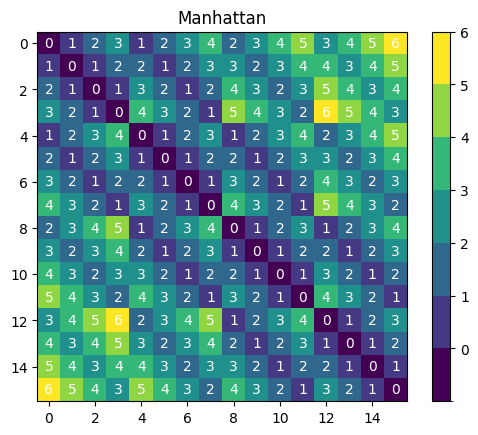

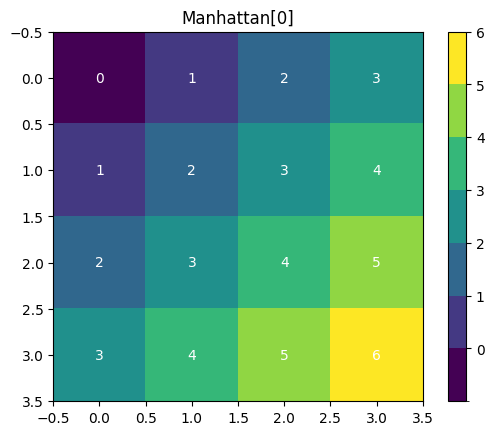

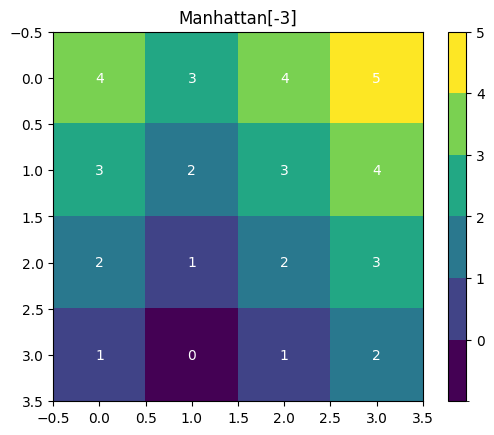

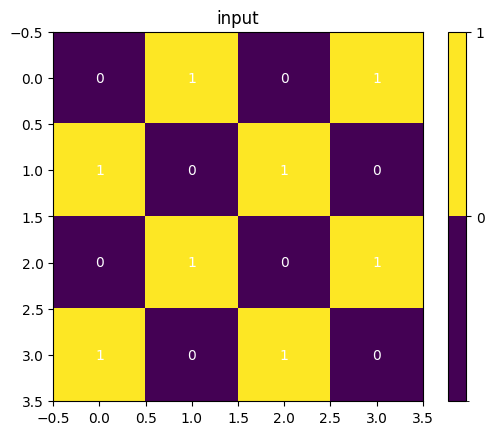

In [65]:


N = 4
r = 6

man = distance_manhattan(N)
# wrap = distance_wrapped(N)
filter_man = np.where(man > r, 0, man)
# filter_wrap = np.where(wrap > r, 0, wrap)

# print(wrap[0])

alternating = np.zeros((N, N), dtype=int)
alternating[1::2, ::2] = 1
alternating[::2, 1::2] = 1

plot_data(filter_man, "Manhattan")
plot_data(filter_man[0].reshape((N,N)), "Manhattan[0]")
plot_data(filter_man[-3].reshape((N,N)), "Manhattan[-3]")
plot_data(alternating, "input")
# plot_data(filter_wrap, "Wrapped manhattan")

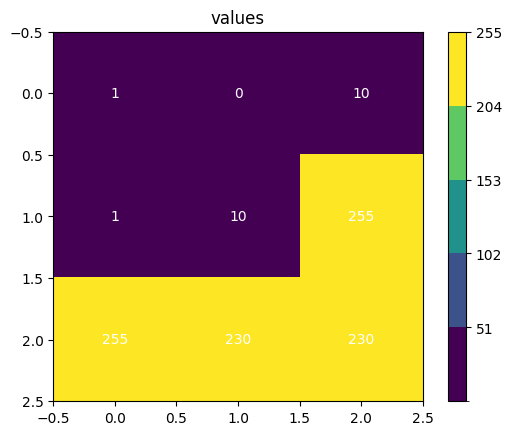

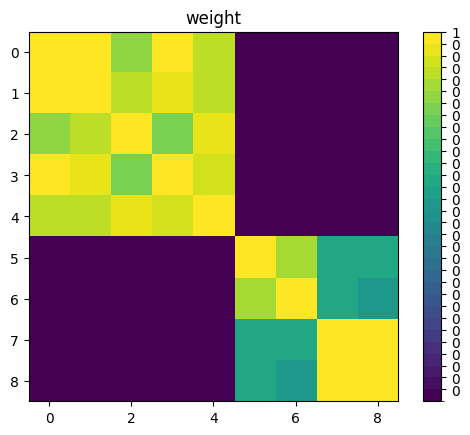

In [66]:
N2 = 3
values = np.array([[1,0,10],
                  [1,10,255],
                  [255,230,230]])

weight = dissimilarity(values/255) # normalization is a must, otherwise infintessimally small values (using the nc weight scheme at least)

plot_data(values, 'values')
plot_data(weight, 'weight', annotate=False)
# plot_data(weight[0].reshape(values.shape), 'weight[0]', annotate=False)
# plot_data(weight[3].reshape(values.shape), 'weight[3]', annotate=False)
# plot_data(weight[-3].reshape(values.shape), 'weight[-3]', annotate=False)

In [67]:
def plot_data_list_hist(data_list, names, title=None,annotate=True):
    num_plots = len(data_list)
    
    fig, axes = plt.subplots(1, 2 * num_plots, figsize=(10 * num_plots, 5))

    for idx, data in enumerate(data_list):
        num_unique_values = len(np.unique(data))
        boundaries = np.linspace(np.min(data), np.max(data), num=num_unique_values + 1)
        cmap = plt.get_cmap('viridis', len(boundaries) - 1)
        norm = BoundaryNorm(boundaries, cmap.N, clip=False)

        image_ax = axes[2 * idx]
        hist_ax = axes[2 * idx + 1]

        # Plot the image on the left subplot
        cax = image_ax.imshow(data, cmap=cmap, norm=norm)

        if annotate:
            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    image_ax.text(j, i, f'{data[i, j]:.3f}', va='center', ha='center', color='w')

        cbar = fig.colorbar(cax, ax=image_ax, cmap=cmap, norm=norm, ticks=boundaries[1:], format='%d')
        image_ax.set_title(names[idx])

        # Plot a histogram on the right subplot
        hist_ax.hist(data.ravel(), bins=9, color='blue', alpha=0.7)
        hist_ax.set_xlim([-1,1])
        hist_ax.set_xlabel('Value')
        hist_ax.set_ylabel('Frequency')
        hist_ax.set_title(f'Histogram - {names[idx]}')

    if title is not None:
        fig.suptitle(title)
    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.show()

In [68]:
import scipy
import torch
import time

include_zero = False

def get_cuts(weight, cases):
    all_vecs = []
    names = []
    if 1 in cases:
        # eigenvectors[:, i] column is normalized eigenvector corresponding to the eigenvalue eigenvalues[i]. 
        start = time.time()
        vals, vecs = np.linalg.eigh(weight)
        print(f'elapsed: {time.time() - start : .4f}')
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        # should already be sorted
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('np.linalg.eigh[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('np.linalg.eigh[:, 1]')
            
    if 2 in cases:
        start = time.time()
        vals, vecs = np.linalg.eig(weight)
        print(f'elapsed: {time.time() - start : .4f}')
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        # reverse order (but not guaranteed?)
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('np.linalg.eig[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('np.linalg.eig[:, 1]')
        
    if 3 in cases:
        start = time.time()
        vals, vecs = scipy.linalg.eigh(weight)
        print(f'elapsed: {time.time() - start : .4f}')
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('scipy.linalg.eigh[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('scipy.linalg.eigh[:, 1]')
        
    if 4 in cases:
        start = time.time()
        vals, vecs = scipy.linalg.eig(weight)
        print(f'elapsed: {time.time() - start : .4f}')
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('scipy.linalg.eig[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('scipy.linalg.eig[:, 1]')
        
    if 5 in cases:
        start = time.time()
        vals, vecs = torch.linalg.eigh(torch.tensor(weight))
        print(f'elapsed: {time.time() - start : .4f}')
        vals = vals.numpy()
        vecs = np.real(vecs.numpy())
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('torch.linalg.eigh[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('torch.linalg.eigh[:, 1]')
        
    if 6 in cases:
        start = time.time()
        vals, vecs = torch.linalg.eig(torch.tensor(weight))
        print(f'elapsed: {time.time() - start : .4f}')
        vals = vals.numpy()
        vecs = np.real(vecs.numpy())
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('torch.linalg.eig[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('torch.linalg.eig[:, 1]')

    return all_vecs, names

def get_cuts_general(A,B, cases):
    all_vecs = []
    names = []
    if 1 in cases:
        # eigenvectors[:, i] column is normalized eigenvector corresponding to the eigenvalue eigenvalues[i]. 
        start = time.time()
        vals, vecs = scipy.linalg.eigh(A,B)
        print(f'elapsed: {time.time() - start : .4f}')
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('scipy.linalg.eigh(A,B)[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('scipy.linalg.eigh(A,B)[:, 1]')
    if 2 in cases:
        start = time.time()
        vals, vecs = scipy.linalg.eig(A,B)
        print(f'elapsed: {time.time() - start : .4f}')
        print(vals)
        print(f'{np.min(vals)} {np.max(vals)}')
        
        idx = np.argsort(vals)
        print(idx)
        if include_zero:
            all_vecs.append(vecs[:, idx[0]])
            names.append('scipy.linalg.eig(A,B)[:, 0]')
        all_vecs.append(vecs[:, idx[1]])
        names.append('scipy.linalg.eig(A,B)[:, 1]')
    return all_vecs, names

def get_cuts_sparse(A,B,cases,sigma=None):
    all_vecs = []
    names = []
    try:
        if 1 in cases:
            which_val = 'SM' if sigma == None else 'LM'
            start = time.time()
            vals, vecs = scipy.sparse.linalg.eigsh(A,k=2,M=B,sigma=sigma, which=which_val)
            print(f'elapsed: {time.time() - start : .4f}')        
            print(vals)
            print(f'{np.min(vals)} {np.max(vals)}')
            
            idx = np.argsort(vals)
            print(idx)
            if include_zero:
                all_vecs.append(np.real(vecs[:, idx[0]]))
                names.append('scipy.sparse.linalg.eigsh[:, 0]')
            all_vecs.append(np.real(vecs[:, idx[1]]))
            names.append('scipy.sparse.linalg.eigsh[:, 1]')
    except:
        print("error on 1")
    if np.isnan(vals).any():
        print("error on 1")
        all_vecs = []
        names = []
    try:
        if 2 in cases:
            which_val = 'SM' if sigma == None else 'LM'
            start = time.time()
            vals, vecs = scipy.sparse.linalg.eigs(A,k=2,M=B,sigma=sigma, which=which_val)
            print(f'elapsed: {time.time() - start : .4f}')
            print(vals)
            print(f'{np.min(vals)} {np.max(vals)}')
            
            idx = np.argsort(vals)
            print(idx)
            if include_zero:
                all_vecs.append(np.real(vecs[:, idx[0]]))
                names.append('scipy.sparse.linalg.eigs[:, 0]')
            all_vecs.append(np.real(vecs[:, idx[1]]))
            names.append('scipy.sparse.linalg.eigs[:, 1]')
    except:
        print("error on 2")
    return all_vecs, names

elapsed:  0.0002
[0.00647338 0.01723486 0.02013613 0.09736556 0.15468544 0.26272733
 0.74864354 3.07653489 4.61619887]
0.0064733757286154605 4.6161988711256585
[0 1 2 3 4 5 6 7 8]
elapsed:  0.0004
[4.61619887 3.07653489 0.26272733 0.09736556 0.00647338 0.01723486
 0.74864354 0.15468544 0.02013613]
0.0064733757286152905 4.616198871125658
[4 5 8 3 7 2 6 1 0]
elapsed:  0.0001
[0.00647338 0.01723486 0.02013613 0.09736556 0.15468544 0.26272733
 0.74864354 3.07653489 4.61619887]
0.006473375728615465 4.616198871125655
[0 1 2 3 4 5 6 7 8]
elapsed:  0.0001
[4.61619887+0.j 3.07653489+0.j 0.26272733+0.j 0.09736556+0.j
 0.00647338+0.j 0.01723486+0.j 0.74864354+0.j 0.15468544+0.j
 0.02013613+0.j]
(0.0064733757286152905+0j) (4.616198871125658+0j)
[4 5 8 3 7 2 6 1 0]
elapsed:  0.0001
[0.00647338 0.01723486 0.02013613 0.09736556 0.15468544 0.26272733
 0.74864354 3.07653489 4.61619887]
0.00647337572861568 4.616198871125657
[0 1 2 3 4 5 6 7 8]
elapsed:  0.0001
[4.61619887+0.j 3.07653489+0.j 0.26272733+0

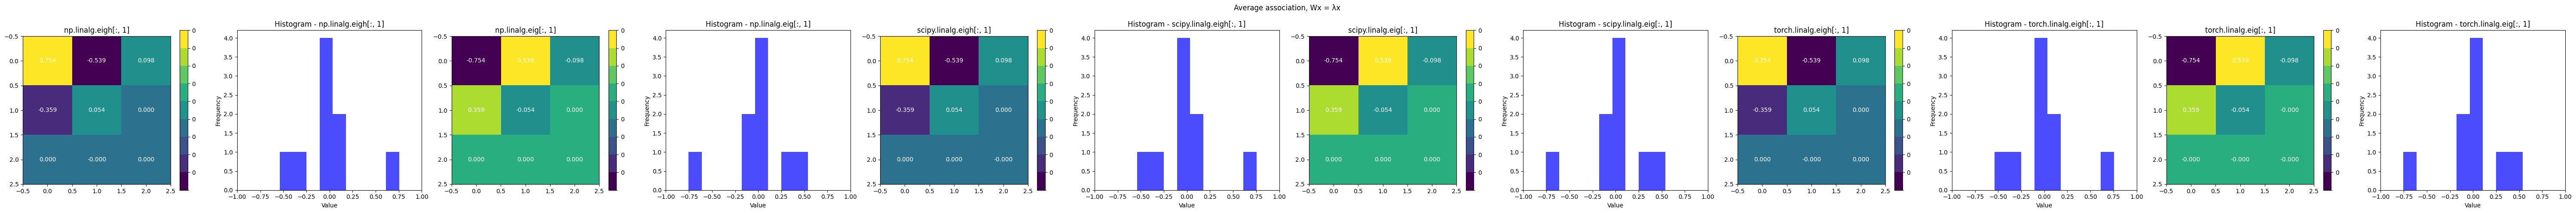

In [69]:
cases = [1,2,3,4,5,6]
all_vecs,names = get_cuts(weight, cases)
data_list = [vec.reshape((N2,N2)) for vec in all_vecs]
plot_data_list_hist(data_list, names, title='Average association, Wx = λx')

# TODO: scipy eigh with generalized option as well
# TODO: be happy

elapsed:  0.0005
[-8.40946053e-16  2.66500231e-15  2.32346572e+00  2.86935133e+00
  3.10733825e+00  4.27844427e+00  4.53334169e+00  4.60757122e+00
  4.65488878e+00]
-8.409460532310827e-16 4.654888778801131
[0 1 2 3 4 5 6 7 8]
elapsed:  0.0003
[ 4.27844427e+00  4.53334169e+00  4.65488878e+00  4.60757122e+00
 -1.87468166e-16  1.20802279e-16  2.32346572e+00  2.86935133e+00
  3.10733825e+00]
-1.8746816636385933e-16 4.654888778801137
[4 5 6 7 8 0 1 3 2]
elapsed:  0.0002
[3.67537647e-15 3.97905927e-15 2.32346572e+00 2.86935133e+00
 3.10733825e+00 4.27844427e+00 4.53334169e+00 4.60757122e+00
 4.65488878e+00]
3.675376466872154e-15 4.654888778801131
[0 1 2 3 4 5 6 7 8]
elapsed:  0.0001
[ 4.27844427e+00+0.j  4.53334169e+00+0.j  4.65488878e+00+0.j
  4.60757122e+00+0.j -1.87468166e-16+0.j  1.20802279e-16+0.j
  2.32346572e+00+0.j  2.86935133e+00+0.j  3.10733825e+00+0.j]
(-1.8746816636385933e-16+0j) (4.654888778801137+0j)
[4 5 6 7 8 0 1 3 2]
elapsed:  0.0002
[1.40274118e-16 2.66592284e-15 2.32346572

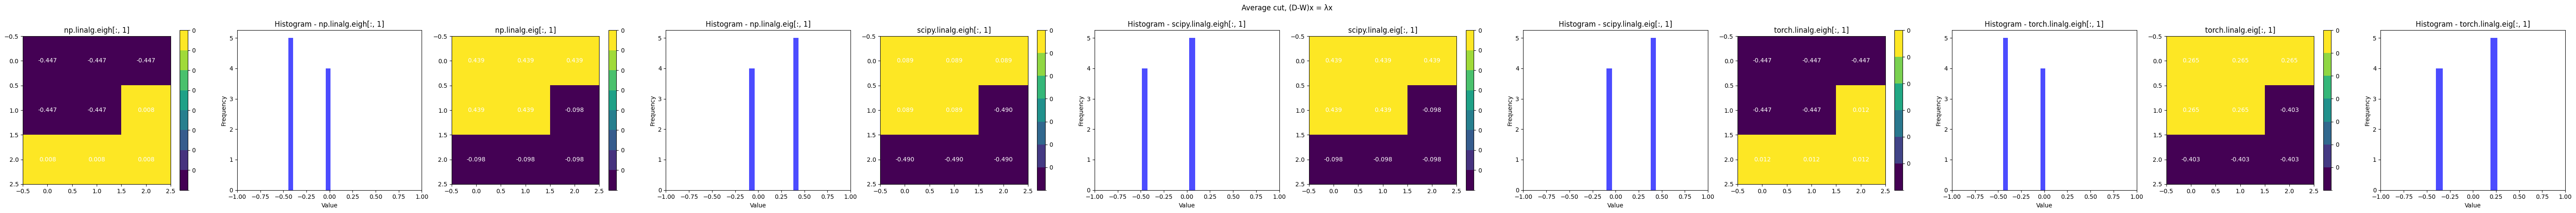

In [70]:
cases = [1,2,3,4,5,6]

# Average cut (D-W), non-generalized form
# or unnormalized laplacian (L = D-W)
d = np.sum(weight, 1)
D = np.diag(d)

all_vecs,names = get_cuts(D-weight, cases)
data_list = [vec.reshape((N2,N2)) for vec in all_vecs]
plot_data_list_hist(data_list, names, title='Average cut, (D-W)x = λx')

elapsed:  0.0003
[-1.18774129e-17 -3.69800698e-18  7.56258319e-01  9.42325416e-01
  9.48903260e-01  9.79008641e-01  9.93552915e-01  9.96301204e-01
  9.98593396e-01]
-1.187741290164535e-17 0.998593395639179
[0 1 2 3 4 5 6 7 8]
elapsed:  0.0004
[ 9.42325416e-01+0.j  9.79008641e-01+0.j  9.96301204e-01+0.j
  9.98593396e-01+0.j -2.34868100e-17+0.j  2.71283918e-17+0.j
  7.56258319e-01+0.j  9.48903260e-01+0.j  9.93552915e-01+0.j]
(-2.3486809953012137e-17+0j) (0.9985933956391774+0j)
[4 5 6 0 7 1 8 2 3]


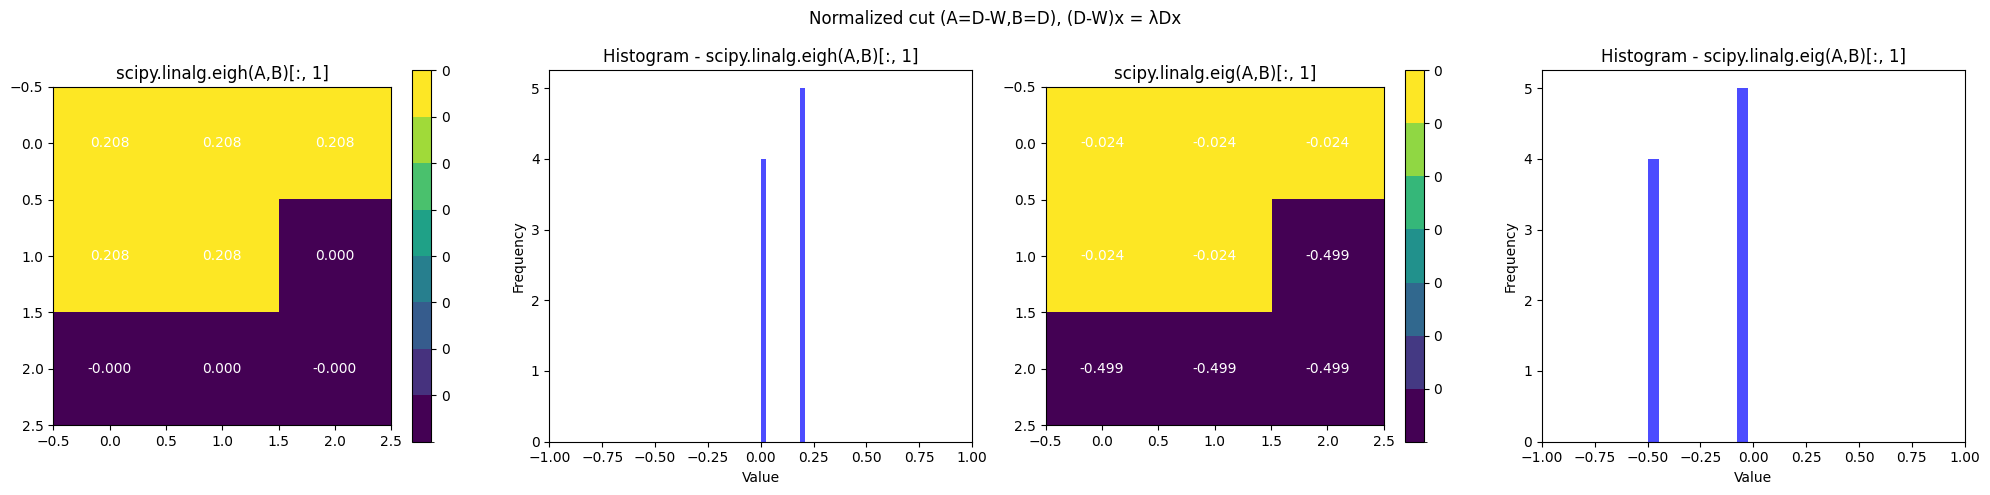

In [71]:
cases = [1,2]

# Normalized cuts (D-W), generalized form
# technically equivalent to symmetrically normalized laplacian (with their inbuilt methods?)
d = np.sum(weight, 1)
D = np.diag(d)

A = D-weight
B = D
all_vecs,names = get_cuts_general(A,B, cases)
data_list = [vec.reshape((N2,N2)) for vec in all_vecs]
plot_data_list_hist(data_list, names, title='Normalized cut (A=D-W,B=D), (D-W)x = λDx') # or Wx = (1-λ)Dx

# also gives perfectly reasonable cuts..
# A = weight
# B = D
# all_vecs,names = get_cuts_general(A,B, cases)
# data_list = [vec.reshape((N2,N2)) for vec in all_vecs]
# plot_data_list_hist(data_list, names, title='Normalized cut (A=W,B=D), (D-W)x = λDx') # or Wx = (1-λ)Dx

D-weight None None
elapsed:  0.0012
[1.82204934e-17 1.77803413e-15]
1.8220493446915733e-17 1.77803412718948e-15
[0 1]
elapsed:  0.0004
[-4.61530762e-17+0.j -1.11112953e-16+0.j]
(-1.111129532315389e-16+0j) (-4.6153076216589364e-17+0j)
[1 0]


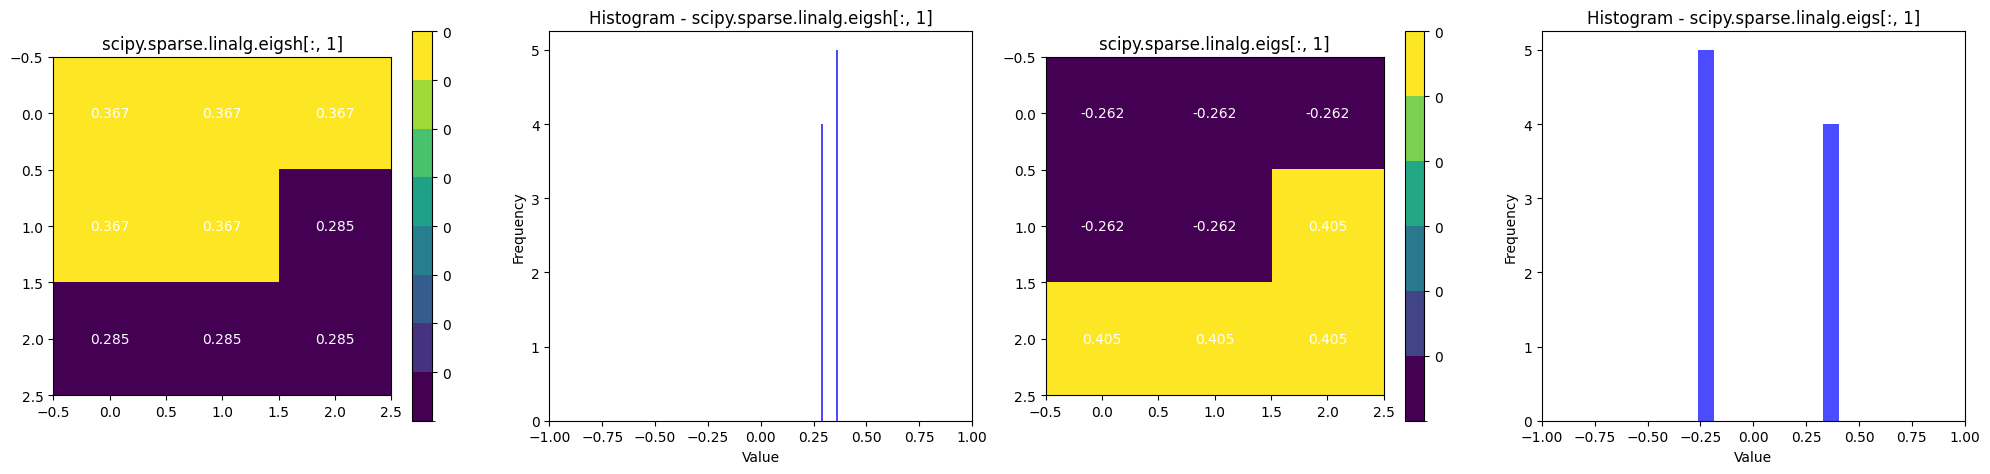

D-weight D None
elapsed:  0.0012
[-4.77546293e-17  1.29862594e-17]
-4.775462934421998e-17 1.298625938806319e-17
[0 1]
elapsed:  0.0010
[-1.04811997e-16+0.j  4.51370567e-17+0.j]
(-1.0481199744921836e-16+0j) (4.513705665680184e-17+0j)
[0 1]


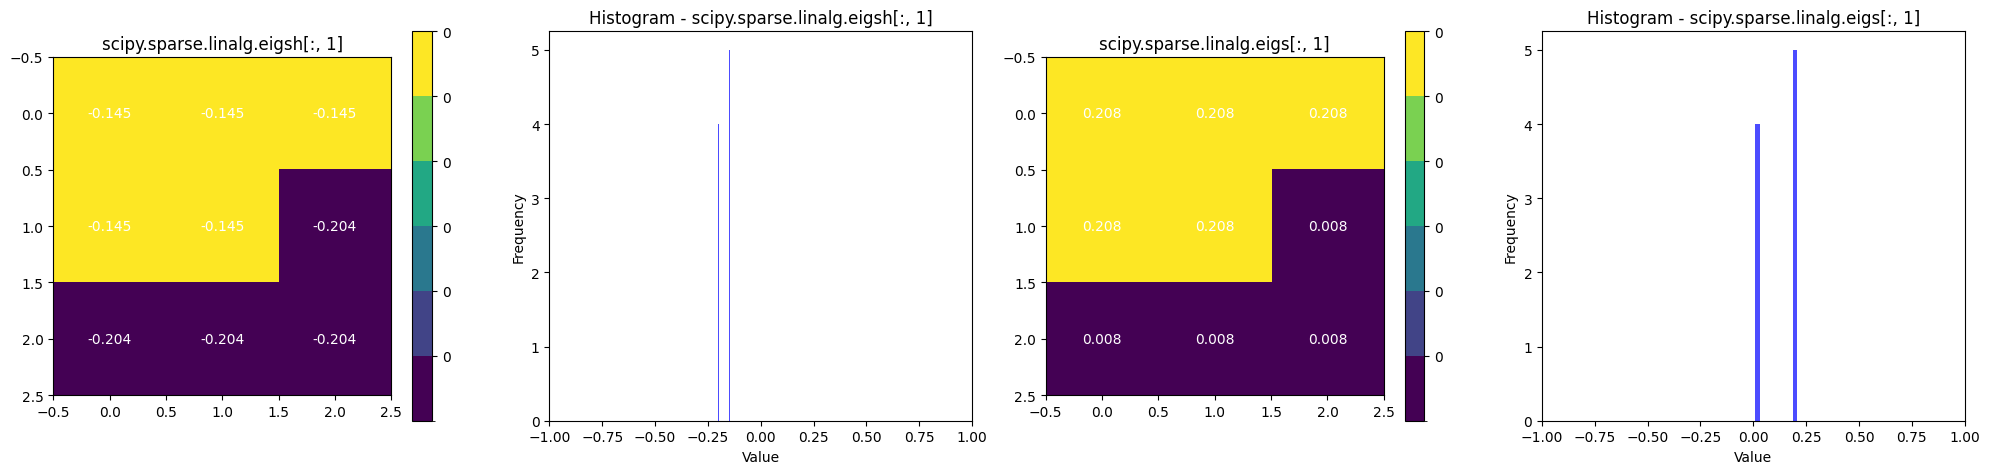

symm_norm_L None None
elapsed:  0.0007
[4.98947647e-17 4.18793763e-16]
4.9894764662563e-17 4.1879376298903397e-16
[0 1]
elapsed:  0.0003
[-5.06172310e-17+0.j  4.67734853e-17+0.j]
(-5.061723103898603e-17+0j) (4.677348529205894e-17+0j)
[0 1]


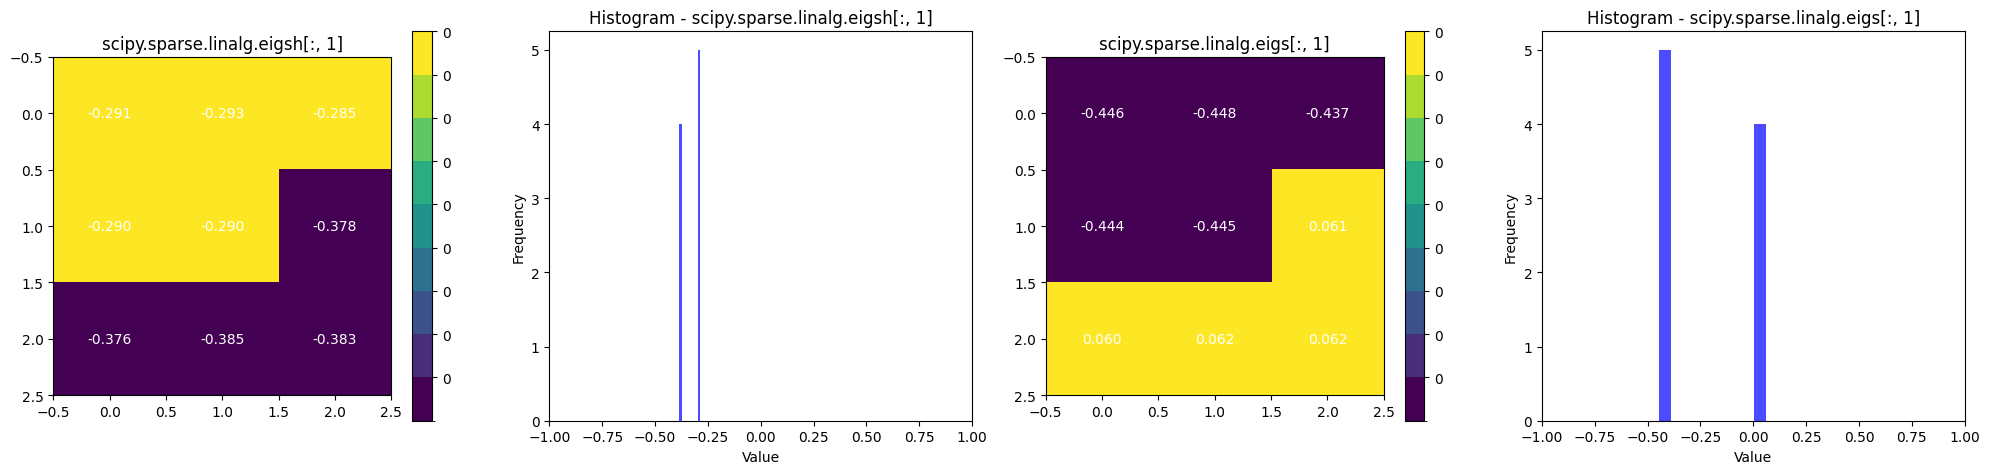

symm_norm_L D None
elapsed:  0.0015
[-6.20385114e-18  2.99059087e-18]
-6.203851138090494e-18 2.9905908678018227e-18
[0 1]
elapsed:  0.0012
[-1.54862396e-17+0.j  4.00942015e-18+0.j]
(-1.548623960082957e-17+0j) (4.009420146140055e-18+0j)
[0 1]


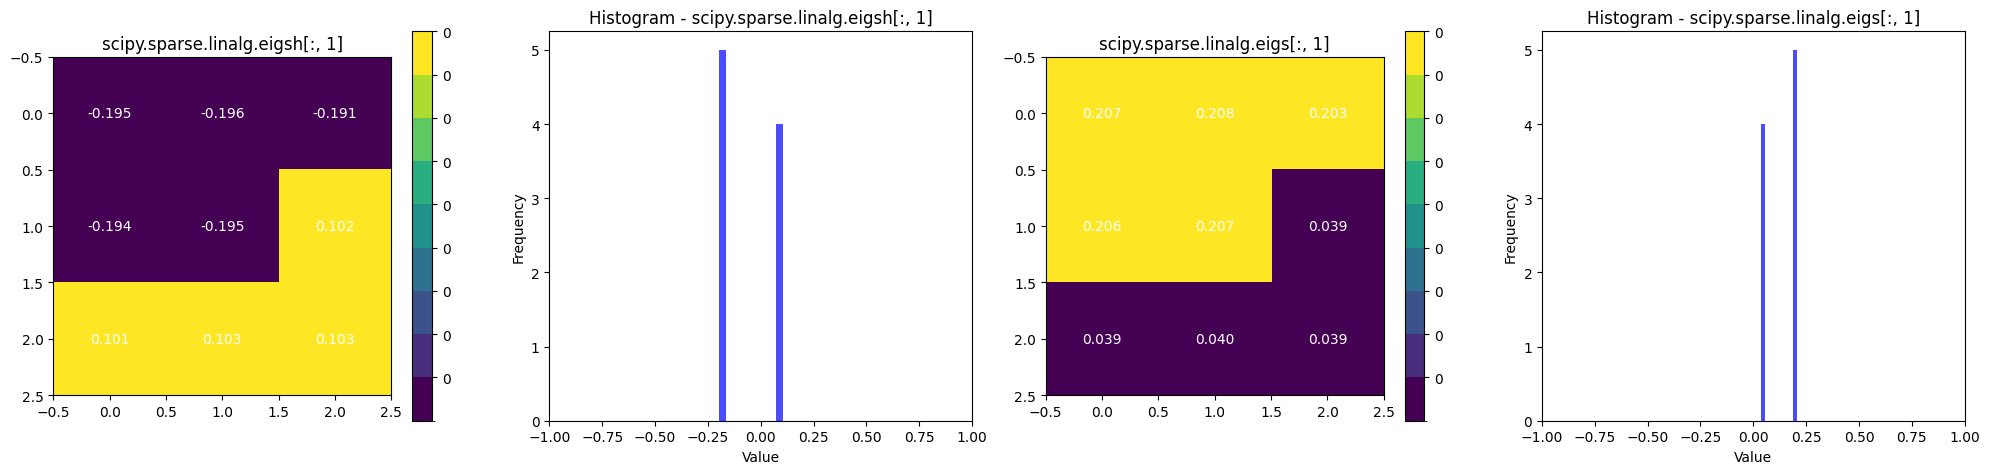

D-weight None None
elapsed:  0.0006
[-9.69228472e-17  6.26194831e-17]
-9.692284723416924e-17 6.26194830633127e-17
[0 1]
elapsed:  0.0005
[-9.05567139e-17+0.j  4.59634012e-16+0.j]
(-9.055671387824799e-17+0j) (4.596340121318041e-16+0j)
[0 1]


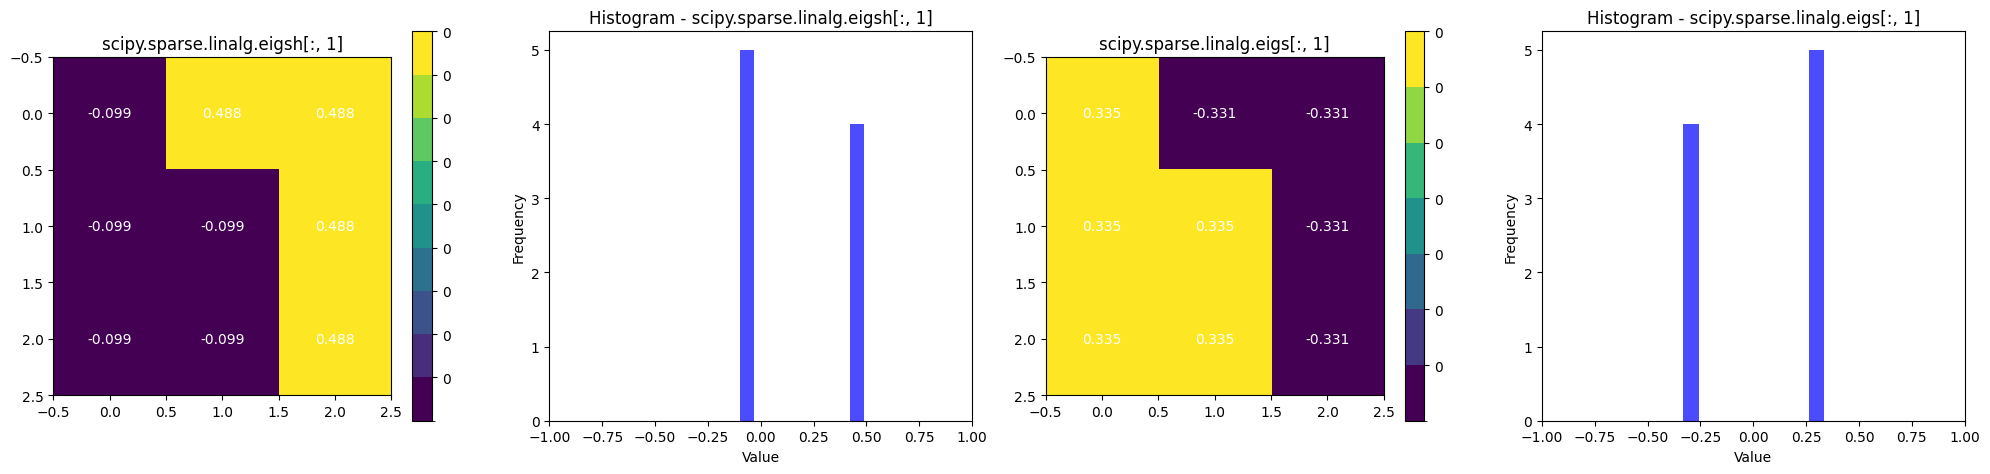

D-weight D None
elapsed:  0.0015
[-1.38886881e-17  3.89041801e-17]
-1.3888688144273232e-17 3.890418011418459e-17
[0 1]
elapsed:  0.0011
[2.57303899e-17+0.j 7.10858625e-18+0.j]
(7.108586246167541e-18+0j) (2.5730389869589587e-17+0j)
[1 0]


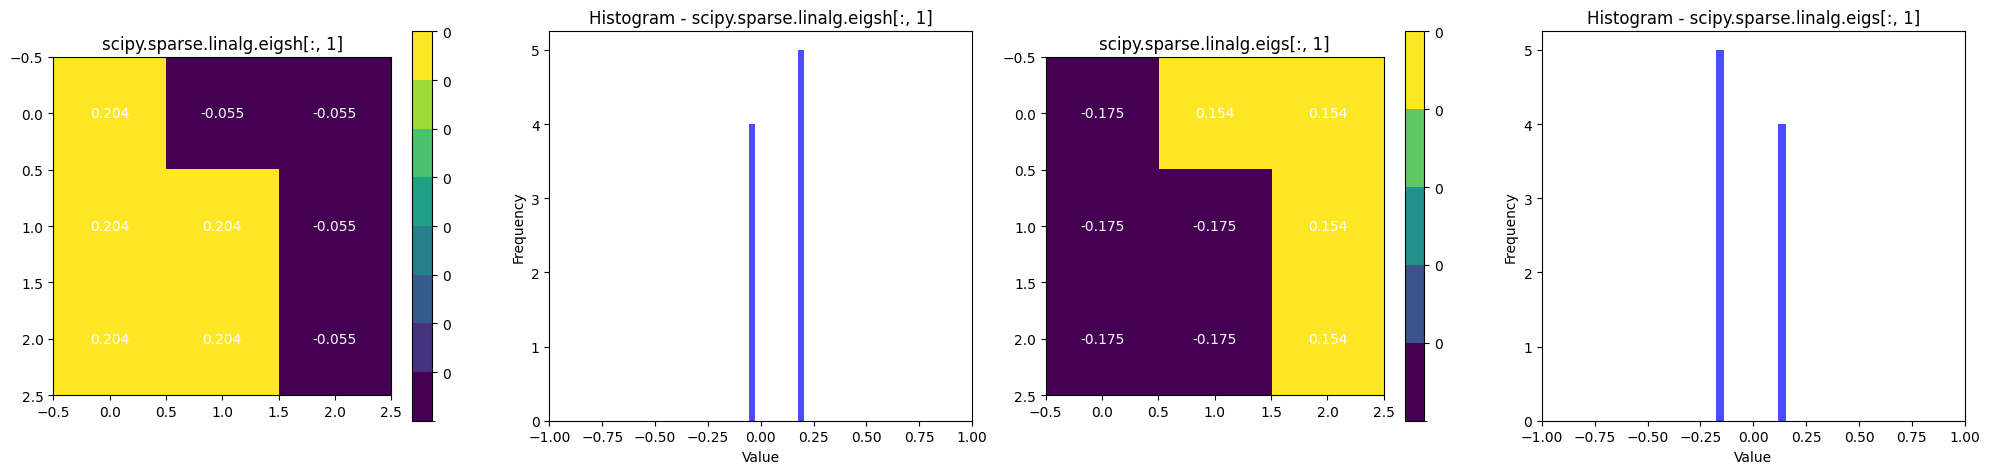

symm_norm_L None None
elapsed:  0.0006
[3.75146415e-17 2.08444060e-16]
3.751464150095173e-17 2.0844406048428694e-16
[0 1]
elapsed:  0.0003
[-3.75741028e-17+0.j  2.61636844e-17+0.j]
(-3.757410283477619e-17+0j) (2.616368436102536e-17+0j)
[0 1]


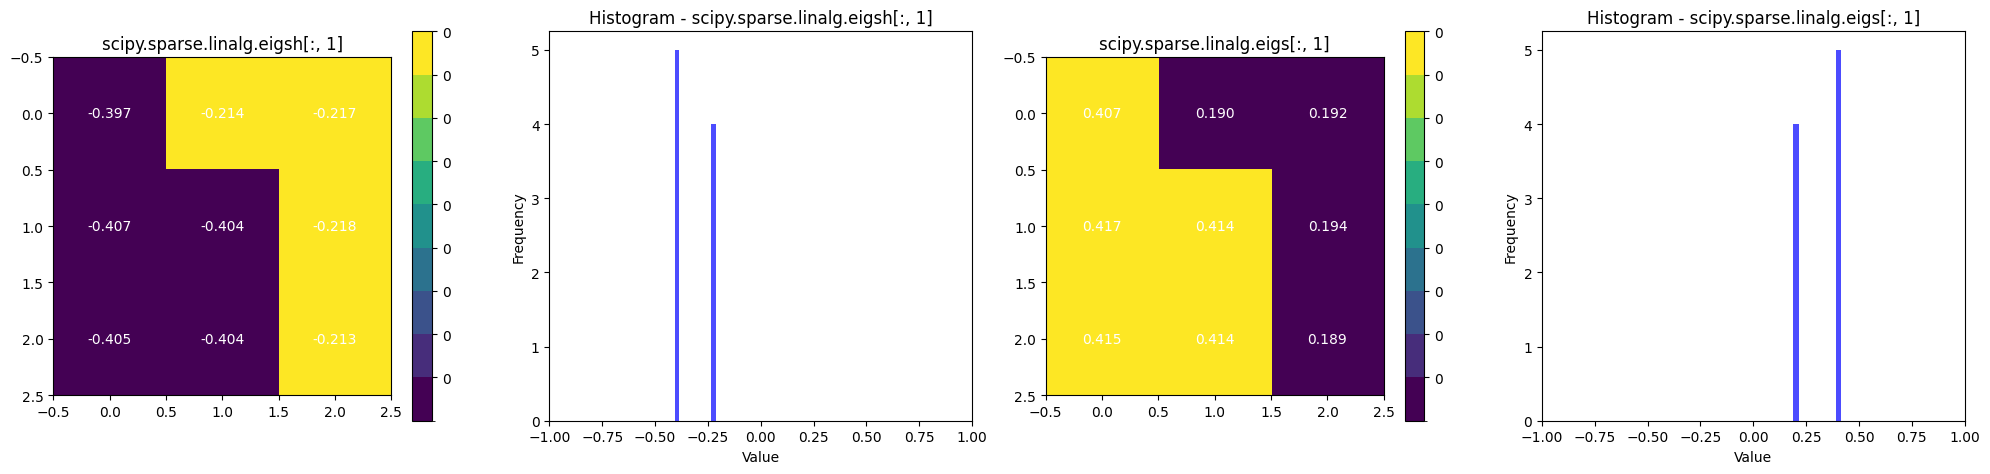

symm_norm_L D None
elapsed:  0.0011
[2.86490449e-18 1.42580365e-17]
2.8649044933732335e-18 1.42580364520867e-17
[0 1]
elapsed:  0.0010
[9.96208572e-20+0.j 1.06860377e-17+0.j]
(9.962085717371285e-20+0j) (1.0686037727376244e-17+0j)
[0 1]


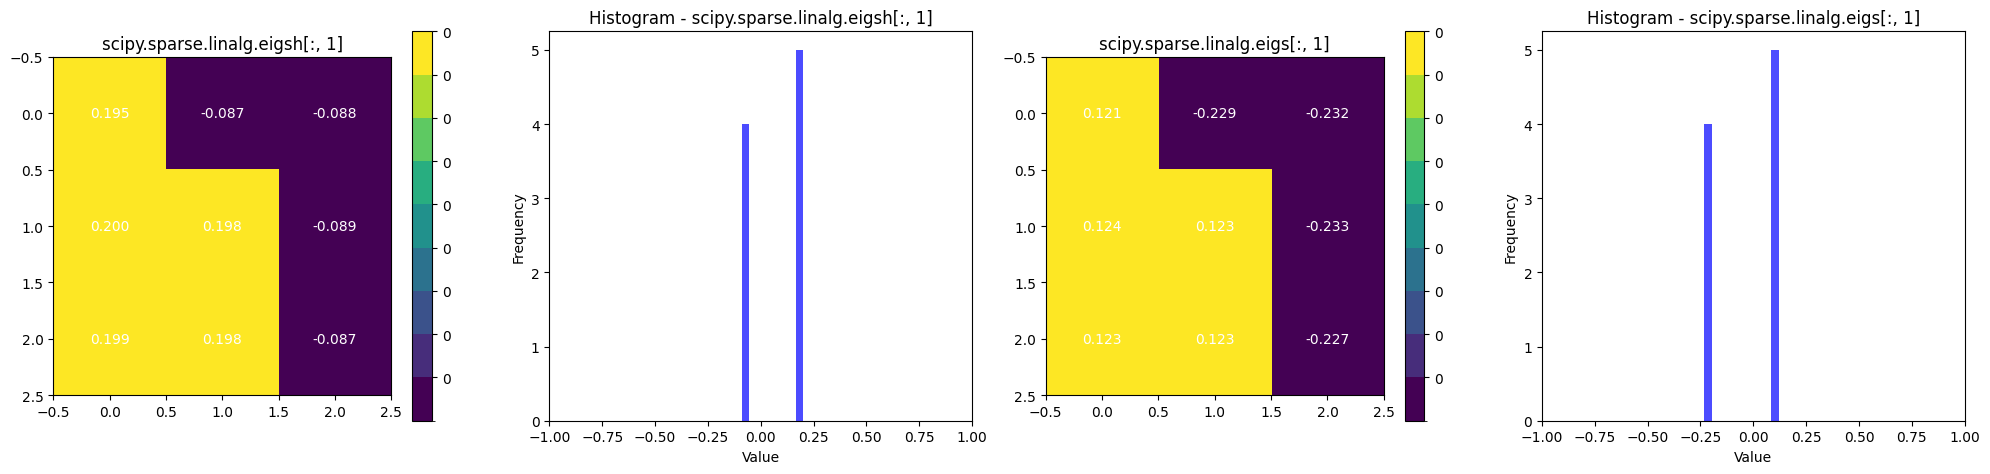

D-weight None None
elapsed:  0.0006
[-2.48362416e-18  1.77648820e-15]
-2.4836241633187655e-18 1.7764881990613215e-15
[0 1]
elapsed:  0.0003
[ 6.48917619e-17+0.j -2.13479518e-16+0.j]
(-2.1347951750516922e-16+0j) (6.489176190431005e-17+0j)
[1 0]


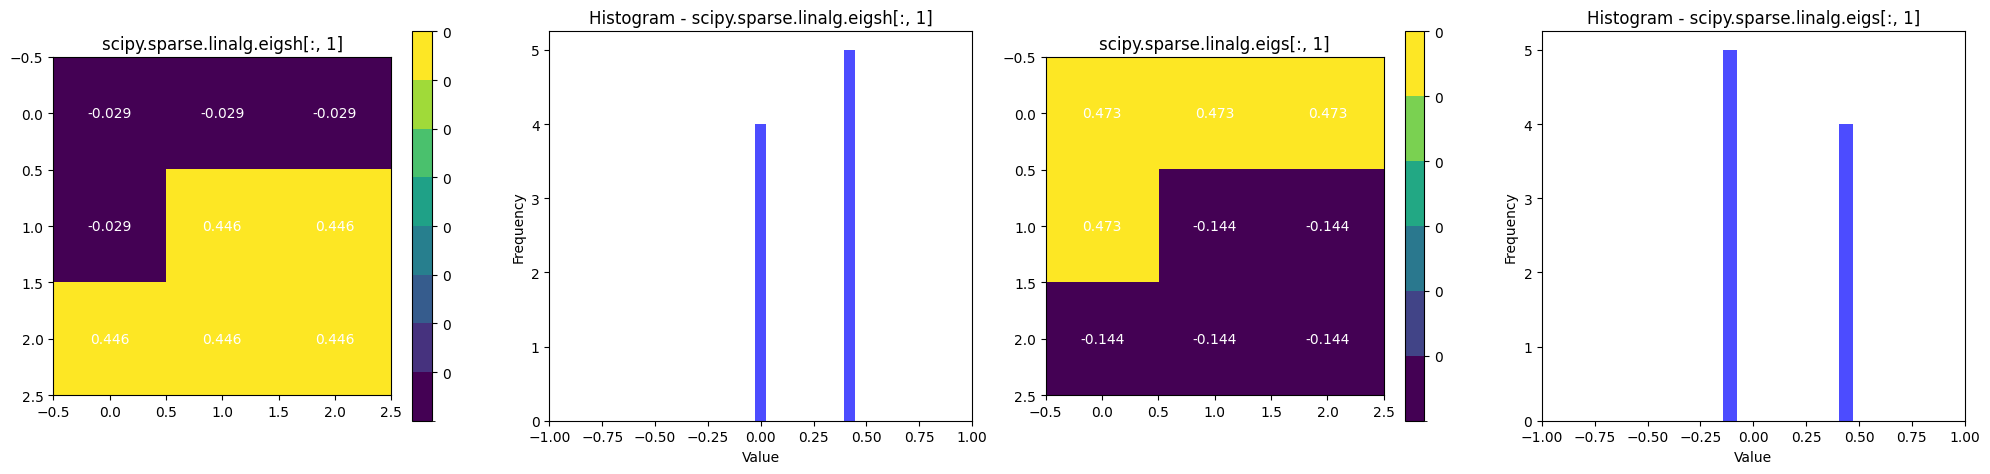

D-weight D None
elapsed:  0.0011
[1.02176524e-18 4.46061282e-17]
1.0217652388178803e-18 4.460612819351935e-17
[0 1]
elapsed:  0.0010
[ 3.96170361e-17+0.j -1.96276172e-17+0.j]
(-1.9627617193405433e-17+0j) (3.9617036107038763e-17+0j)
[1 0]


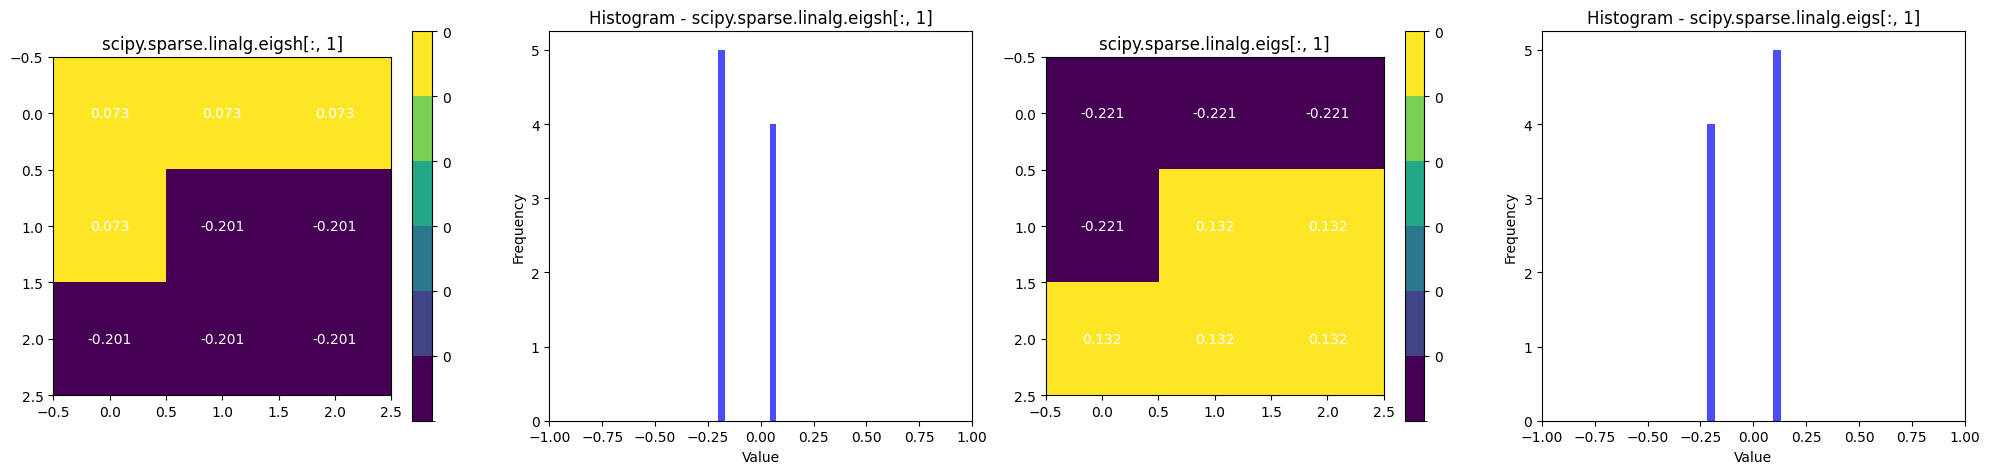

symm_norm_L None None
elapsed:  0.0006
[-3.22155280e-16  1.95862208e-17]
-3.221552796821155e-16 1.958622079924597e-17
[0 1]
elapsed:  0.0003
[-4.66063098e-17+0.j  1.53420601e-17+0.j]
(-4.660630979199524e-17+0j) (1.5342060128234035e-17+0j)
[0 1]


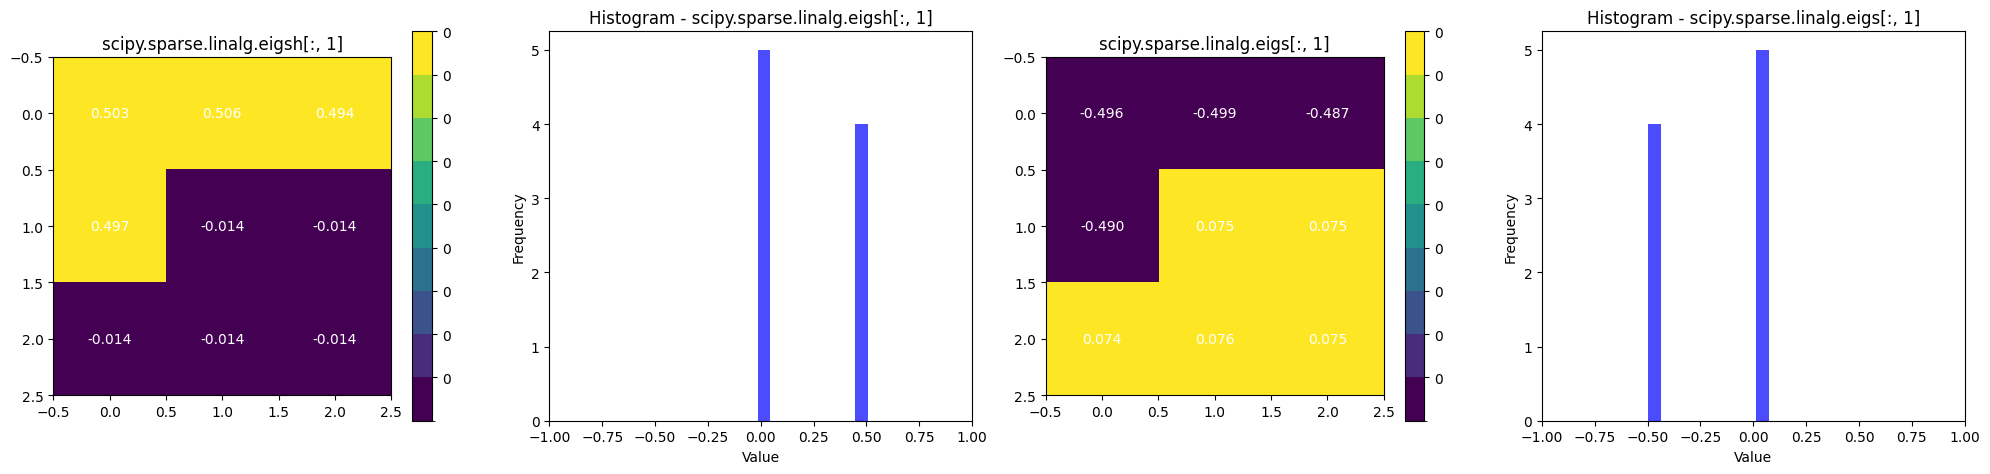

symm_norm_L D None
elapsed:  0.0011
[4.51933146e-19 1.16798918e-17]
4.519331460859707e-19 1.1679891789879783e-17
[0 1]
elapsed:  0.0010
[3.35354106e-19+0.j 9.74224776e-18+0.j]
(3.3535410598990975e-19+0j) (9.742247758155133e-18+0j)
[0 1]


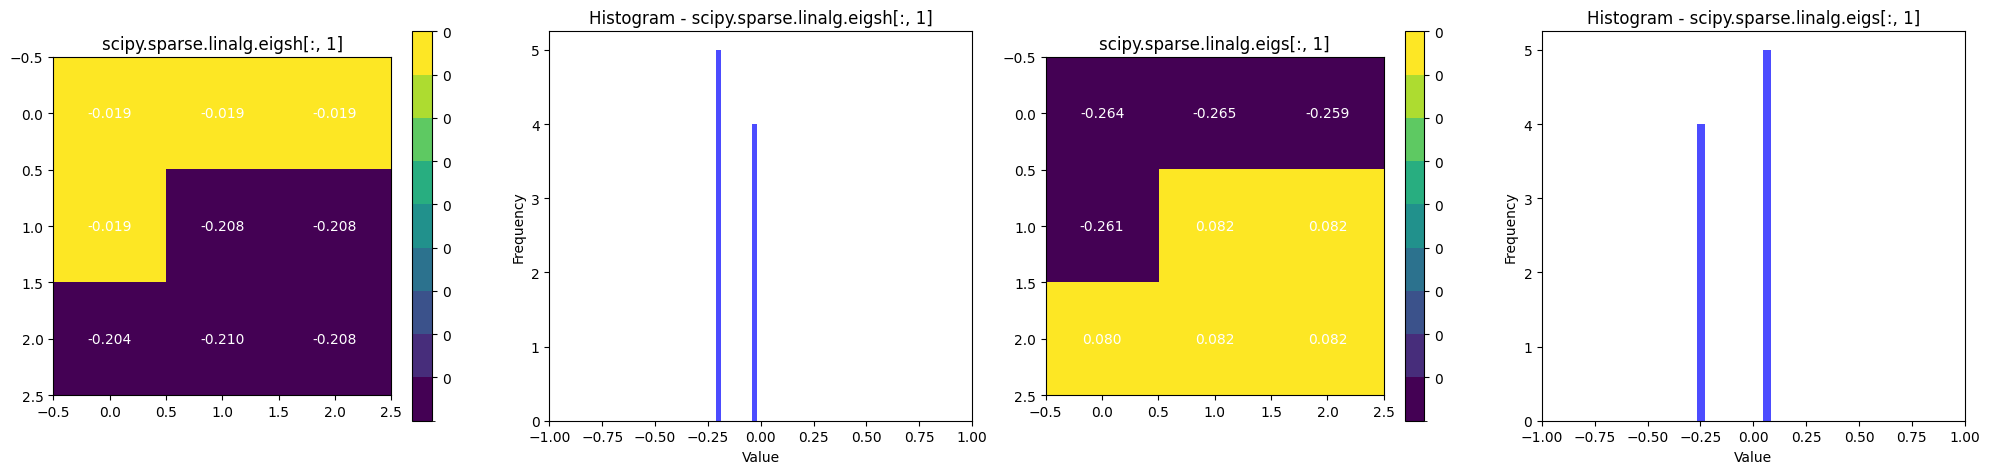

In [74]:
cases = [1,2]

# Normalized cuts (D-W), generalized form
# technically equivalent to symmetrically normalized laplacian (with their inbuilt methods?)
values1 = np.array([[1,0,10],
                  [1,10,255],
                  [255,230,230]])

weight1 = dissimilarity(values/255) # normalization is a must, otherwise infintessimally small values (using the nc weight scheme at least)

values2 = np.rot90(values1)
weight2 = dissimilarity(values2/255)

values3 = np.rot90(values2)
weight3 = dissimilarity(values3/255)


weights = [weight1, weight2, weight3]

for weight in weights:
    D = np.diag(np.sum(weight, 1))
    unnormed_laplace = D-weight
    degree_sqrt_inv = np.reciprocal(np.sqrt(D, where=D!=0), where=np.sqrt(D)!=0)

    symmetrically_normalized_laplacian = degree_sqrt_inv @ unnormed_laplace @ degree_sqrt_inv
    A_list = [D-weight, symmetrically_normalized_laplacian] # using just weight is average association and doesn't work for this input
    A_list_names = ["D-weight", "symm_norm_L"] # ,"D-weight"
    D_list = [None, D] # D
    D_list_names = ["None", "D"]
    sigma_list = [None]
    sigma_list_names = ["None"]

    for i_a,a in enumerate(A_list):
        for i_d,d in enumerate(D_list):
            for i_s,sigma in enumerate(sigma_list):
                print(f'{A_list_names[i_a]} {D_list_names[i_d]} {sigma_list_names[i_s]}')
                all_vecs,names = get_cuts_sparse(a,d,cases,sigma)
                data_list = [vec.reshape((N2,N2)) for vec in all_vecs]
                plot_data_list_hist(data_list, names, title='') # or Wx = (1-λ)Dx

In [73]:
# scipy.sparse.linalg.lobpcg(A, X, B)
# Ax = lambda B x
# where X is the initial guess